In [1]:
from joblib import Parallel, delayed
from time import time
import os
import numpy as np
import subprocess
import tempfile



def res_cmd_lfeed(cmd):
    return subprocess.Popen(
      cmd, stdout=subprocess.PIPE,
      shell=True).stdout.readlines()[0].decode().split(" ")[1].rstrip("\n")

def res_cmd_no_lfeed(cmd):
    return [str(x).rstrip("\n") for x in res_cmd_lfeed(cmd)]



def process(i, j):
    word_bytes = ">seq\n"+str(i)
    fp1 = tempfile.NamedTemporaryFile(mode='w+')
    fp1.write(word_bytes)
    fp1.seek(0)

    word_bytes = ">seq\n"+str(j)
    fp2 = tempfile.NamedTemporaryFile(mode='w+')
    fp2.write(word_bytes)
    fp2.seek(0)
    locarna_option = "locarna  -p 0.0005 --max-diff-am 50 --tau 50 --indel-open -800 --indel -400 --struct-weight 10 --max-diff 100"
    cmd = (locarna_option+" "+str(fp1.name)+" "+str(fp2.name))
    ans = float(res_cmd_lfeed(cmd))/(len(i)+len(j))
    return ans 

# ファイルをオープンする
test_data = open("cliques-low.fa", "r")
# test_data = open("sample.fa", "r")

# 行ごとにすべて読み込んでリストデータにする
lines = [ i.rstrip('\n') for i in test_data.readlines()[1::2]]

# ファイルをクローズする
test_data.close()
locarna_score = Parallel(n_jobs=-1)([delayed(process)(lines[i], lines[j]) for i in range(len(lines)) for j in range(i+1, len(lines))])

In [2]:
distance_score = np.array(locarna_score)
distance_score = (distance_score - distance_score.min())/(distance_score.max() - distance_score.min())
distance_score =  -1 * np.log(distance_score+ 0.00001)
distance_score = distance_score.astype('str').tolist()
distance_score

['0.179270246957484',
 '0.3766534858832725',
 '1.3318427480524433',
 '1.4510438490457225',
 '1.8609187993716207',
 '1.0471327369500252',
 '1.6338407792529106',
 '1.3317578845159381',
 '1.3956170557953467',
 '1.1205224137632928',
 '1.1154808444669637',
 '1.1473316117664247',
 '1.3817829970975253',
 '1.3665548929443705',
 '1.443384537379476',
 '1.54201780346225',
 '1.459149768611265',
 '1.105731996074931',
 '1.3863843212174052',
 '1.3661790472381259',
 '1.5230628661344063',
 '1.4153389191699581',
 '1.4091866204297119',
 '1.6855750081483267',
 '1.474380193405147',
 '1.5097768002639438',
 '1.5263745774667956',
 '1.9159145587541515',
 '1.3488971279357154',
 '1.3317578845159381',
 '1.372370848636628',
 '1.5289675668609752',
 '1.7867510793205432',
 '1.5389918196255377',
 '1.295999974938983',
 '1.0865148687469737',
 '2.007331123064555',
 '1.6269640897566742',
 '1.8358260964489526',
 '1.8430958681792726',
 '1.6864394678827235',
 '1.4869518879655774',
 '1.6684409147585457',
 '1.4180520747207446'

In [3]:
str_ = '\n'.join(distance_score)
with open("locarna_score_cliques-low.txt", 'wt') as f:
# with open("sample.txt", 'wt') as f:
    f.write(str_)

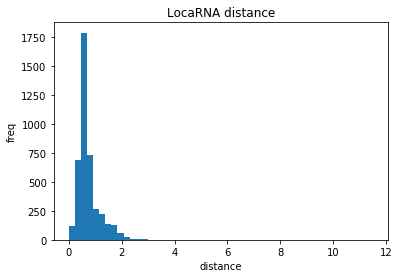

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([float(i) for i in distance_score])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(x, bins=50)
ax.set_title('LocaRNA distance')
ax.set_xlabel('distance')
ax.set_ylabel('freq')
fig.show()